In [ ]:
# This notebook explores the Breast Cancer dataset, trains a neural network, and visualizes the training process.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append("../src")
from neural_net import NeuralNet



In [26]:
# Load dataset
df = pd.read_csv("../data/breast_cancer.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# Data Preprocessing

# Split features and labels
X = df.iloc[:, :-1].values  # Features
y = df["label"].values  # Target labels (0 = Malignant, 1 = Benign)

# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [13]:
# Now we will Train Neural Network

# Initialize model
input_size = X.shape[1]
model = NeuralNet(input_size=input_size, hidden_size=16, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
loss_values = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("✅ Model training completed!")


Epoch [10/50], Loss: 0.2616
Epoch [20/50], Loss: 0.0998
Epoch [30/50], Loss: 0.0672
Epoch [40/50], Loss: 0.0547
Epoch [50/50], Loss: 0.0471
✅ Model training completed!


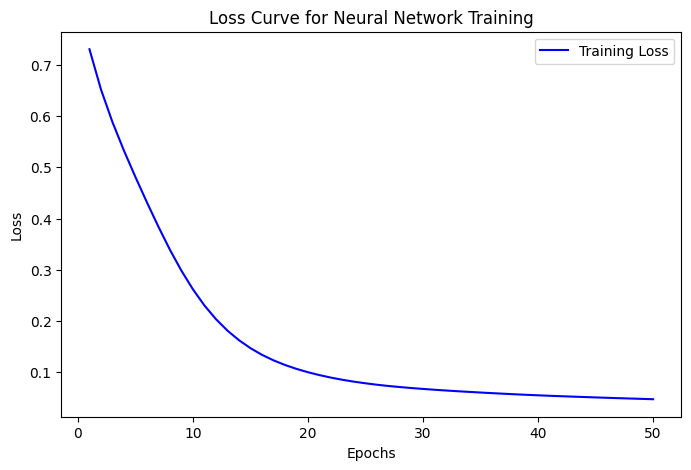

In [14]:
# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), loss_values, label="Training Loss", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for Neural Network Training")
plt.legend()
plt.show()


In [15]:
# Evaluate accuracy
with torch.no_grad():
    test_outputs = model(X_test)
    _, predictions = torch.max(test_outputs, 1)
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")


✅ Model Accuracy: 98.25%


In [20]:
optimizers = ["SGD", "Adam", "RMSprop"]
results = {}

for name in optimizers:
    print(f"\n🔹 Training with {name} optimizer")
    model = NeuralNet(input_size=input_size, hidden_size=16, output_size=2)  # New model instance for each optimizer

    # Define optimizer correctly inside the loop
    if name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)

    loss_values = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    results[name] = loss_values  # Store loss for each optimizer



🔹 Training with SGD optimizer
Epoch 10/50], Loss: 0.5426
Epoch 20/50], Loss: 0.5038
Epoch 30/50], Loss: 0.4700
Epoch 40/50], Loss: 0.4401
Epoch 50/50], Loss: 0.4138

🔹 Training with Adam optimizer
Epoch 10/50], Loss: 0.1565
Epoch 20/50], Loss: 0.0757
Epoch 30/50], Loss: 0.0594
Epoch 40/50], Loss: 0.0484
Epoch 50/50], Loss: 0.0404

🔹 Training with RMSprop optimizer
Epoch 10/50], Loss: 0.0576
Epoch 20/50], Loss: 0.0397
Epoch 30/50], Loss: 0.0301
Epoch 40/50], Loss: 0.0222
Epoch 50/50], Loss: 0.0172


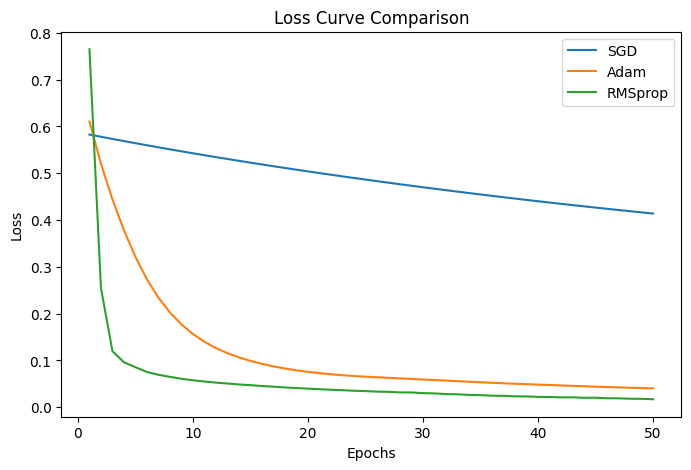

In [21]:
plt.figure(figsize=(8, 5))
for name, loss in results.items():
    plt.plot(range(1, epochs+1), loss, label=name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison")
plt.legend()
plt.show()
